## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
   Regression predicts a continuous numerical outcome while classification predicts a categorical label. Examples of regression predictions include temperature and house price while classification predictions include disease vs no disease, etc.
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
   A confusion matrix is a table that compares a classifier's predicted labels with the true labels. For binary classification, it includes: True Positive, True Negative, False Positive, False Negative. It can help us understand what types of errors the model makes and whether it tends to miss positives or incorrectly flag negatives. It also gives us insight on performance beyond just overall accuracy. 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
   Accuracy is the proportion of correct predictions. It is calculated by dividing 'number of correct predictions' by 'total predictions'. It is not entirely sufficient because it can be misleading with imbalanced data and does not distinguish between types of errors (FP v FN). It is also insufficicent because a model predicting the majority class can have high accuracy but poor real-world usefulness. 
4. What does the root mean squared error quantify about a particular model?
   Root mean squared error measures the average magnitude of prediction errors in regression. It quantifies how far predictions are from true values (on avg) and error magnitude in the same units as the outcome variable. 
5. What are overfitting and underfitting? 
   Overfitting is when the model fits the training data too closely, capturing noise rather than true patterns. On the other hand, underfitting the model is too simple to capture the underlying pattern. 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
   Splitting the data allows us to evaluate performance on unseen data, it helps estimate how the model will perform in the real world, and prevents choosing a model that only works well on training data. Choosing k based on test performance balances bias and variance, reduces overfitting, and encourages better generalization. 
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
   Some of the strengths of predicting a class label are that it is simple and easy to interpret and is directly actionable. Some weaknesses are that there is no information about confidence, it cannot easily adjust decision thresholds, and may hide some uncertanties. 
   Some strengths of predicting probabilities are that it provides confidence levels, allows threshold adjustment, and it is more informative for decision-making. Some weaknesses are that it is slightly more complex to interpret and it requires additional steps to convert into a final decision.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

QUESTION 1 BELOW

In [3]:
import pandas as pd 

df = pd.read_csv("../data/land_mines.csv")
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [4]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [5]:
df['mine_type'].value_counts()
df['mine_type'].value_counts(normalize=True)

mine_type
1    0.210059
2    0.207101
3    0.195266
4    0.195266
5    0.192308
Name: proportion, dtype: float64

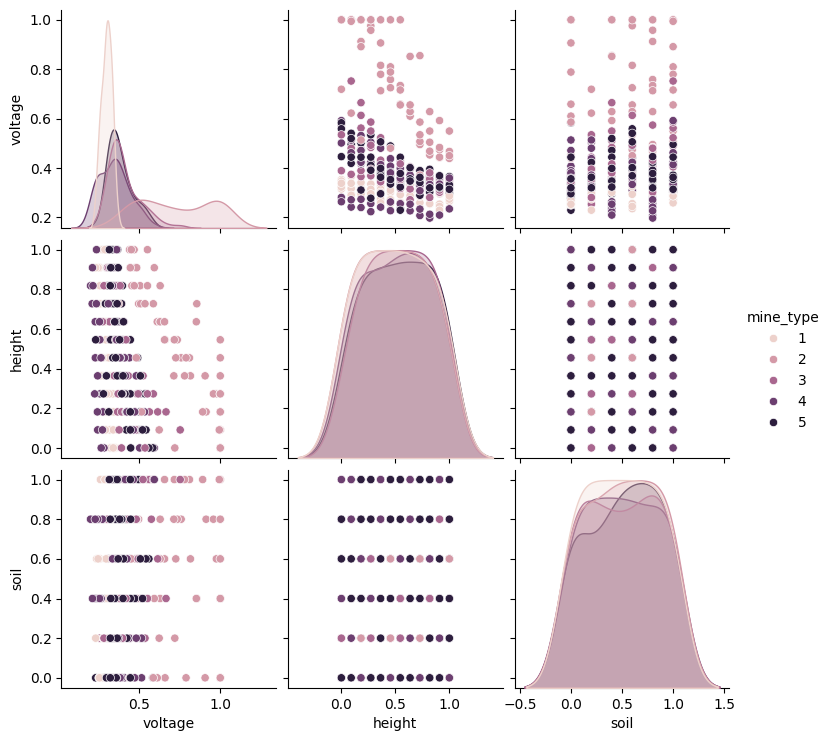

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="mine_type")
plt.show()

QUESTION 2 BELOW

In [7]:
from sklearn.model_selection import train_test_split

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

QUESTION 3 BELOW

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [9]:
param_grid = {'knn__n_neighbors': range(1, 21)}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

best_k = grid.best_params_['knn__n_neighbors']
best_model = grid.best_estimator_

print("Best k:", best_k)

Best k: 6


I selected my k based which value maximizes cross-validated accuracy on the training data. To view this I created a grid fit that finds the most accurate k-value for my model. 

QUESTION 4 BELOW

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.41420118343195267
Confusion Matrix:
 [[23  0  7  5  1]
 [ 0 34  0  1  0]
 [ 9  3  5  6 10]
 [15  5  7  3  3]
 [ 9  2 10  6  5]]


The overall accuracy of 0.414 or 41.4% indicates that the model correctly classifies only about 4 of 10 mines in the test set. For a 5-class problem, random guessing woudl give about 20% accuracy, so the model is better than random but is still quite weak. 

The accuracy for mine Type 1 was 23/36 so ~64%. These Type 1 mines were most commonly misclassified as Type 3 and 4. 
The accuracy for mine Type 2 was 34/34 or ~97%. An almost perfect classification. This suggests that Type 2 has very distinct feature values. 
The accuracy for mine Type 3 was 5/33 so ~15%. These Type 3 mines were often confused with Type 1 (9), Type 5 (10), and Type 4 (6). This model did not do well in distinguishing Type 3.
The accuracy for mine Type 4 was 3/33 so ~9%. These Type 4 mines were often confused with Type 1 (15), Type 3 (7), and Type 2 (5). This model essentially fails at distinguishing Type 4 mines. 
The accuracy for mine Type 5 was 5/32 so ~16%. These Type 5 mines were often confused with Type 3 (10), Type 1 (9), and Type 4 (6). This model essentially fails at distinguishing Type 5 mines. 

QUESTION 5 BELOW

Given the 41% accuracy and the confusion matrix, this model should not be used as a standalone decision tool. It performs very well for Mine Type 2 and moderately for Mine Type 1, but performs very poorly fot Types 3, 4, and 5. In practice, I would recommend to use this model as a decision support only, not as a final authority. I would also recommend to use it to look at predicted probabilities, not just the class label. Because the model frequently confuses several mine types, relying on it blindly could lead to unsafe decisions. 

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

QUESTION 1 BELOW

In [15]:
import pandas as pd
cars = pd.read_csv("../data/USA_cars_datasets.csv")
cars = cars[['price', 'year', 'mileage']]

cars.head()
cars.shape
cars.isna().sum()

price      0
year       0
mileage    0
dtype: int64

In [16]:
cars = cars.dropna()

QUESTION 2 BELOW

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

QUESTION 3 BELOW

In [18]:
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

QUESTION 4 BELOW

k=3, MSE=148104157.1862222


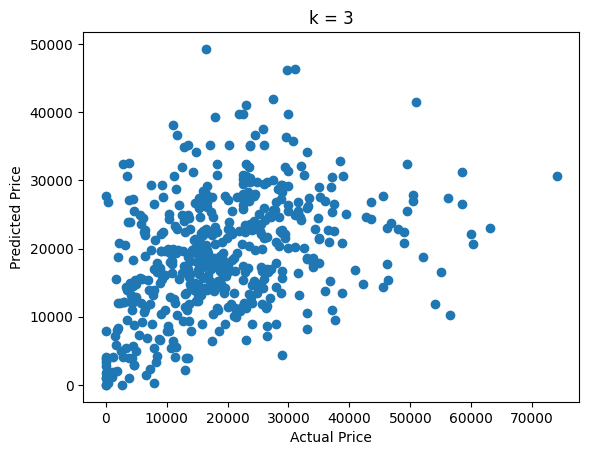

k=10, MSE=117399126.10604002


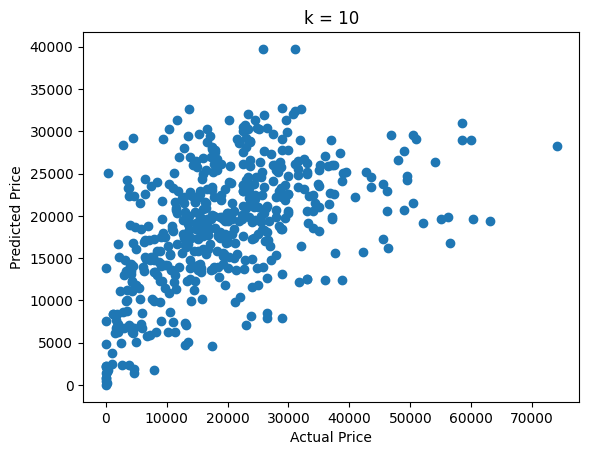

k=25, MSE=112600455.15990078


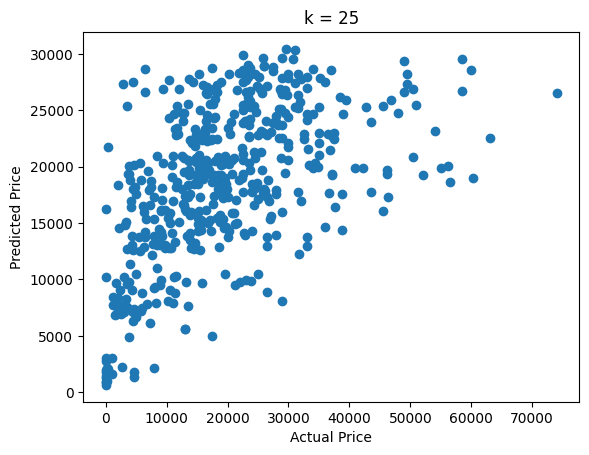

k=50, MSE=110202287.21426159


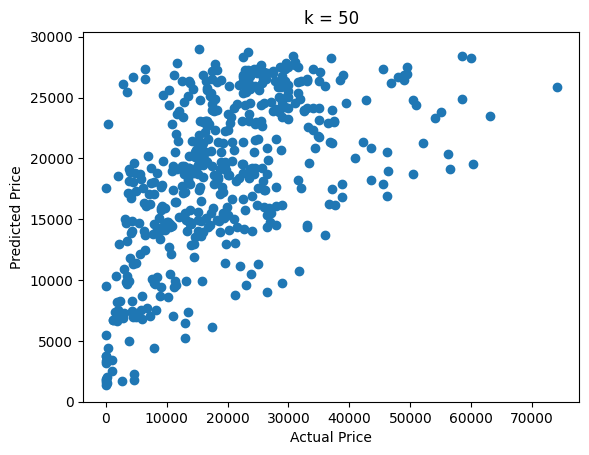

k=100, MSE=112250845.4893072


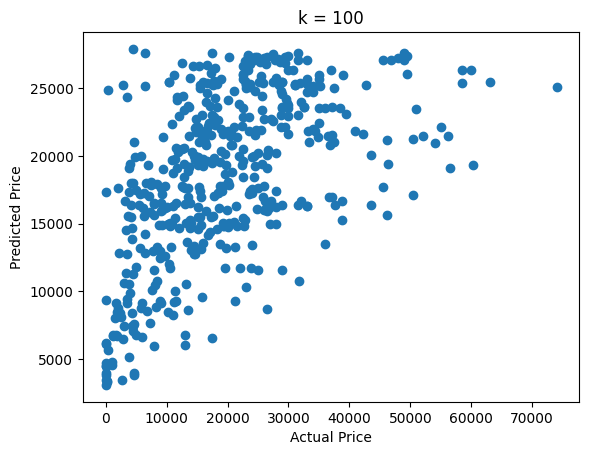

k=300, MSE=114497778.21548478


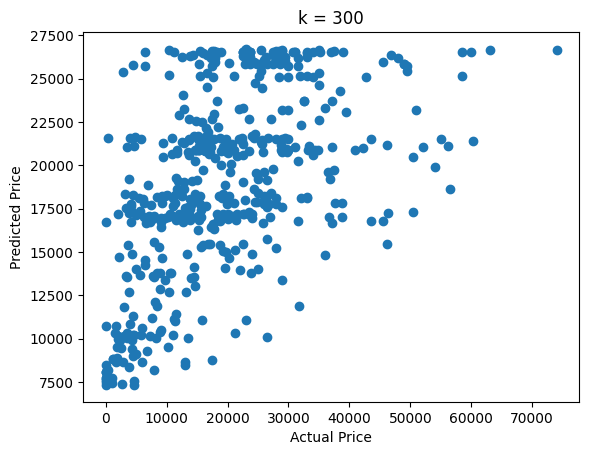

In [19]:
# We test: k = 3, 10, 25, 50, 100, 300
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"k={k}, MSE={mse}")
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}")
    plt.show()

As k increases, predictions become smoother and less responsive to local structure. Small k values generate predictions that closely track individual data points while large k values generate reduced variability. 

QUESTION 5 BELOW

The optimal k value is the one with the lowest MSE. Very small k values generally have higher MSE through overfitting, while very large k values also have higher MSE through underfitting. To find the lowest MSE, we typically look for a moderate k value. In many datasets, optimal k is often around 25-50, but you determine it from the printed MSE value.

QUESTION 6 BELOW

As k varied at small k's, the model overfit. Predictions followed noise in the training data, leading to high variance and unstable predictions. As k was at larger values, the model underfit. Predictions became too smooth and converged toward the overall average price, ignoring meaningful variation from year and mileage. The best values of k were more intermediate, which balanced bias and variance.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

QUESTION 1 BELOW

In [29]:
import pandas as pd

heart = pd.read_csv("../data/heart_failure_clinical_records_dataset.csv")
print(heart.shape)
print(heart.head())
print(heart.isna().sum())

heart = heart.drop(columns=["time"])
print(heart.shape)

(299, 13)
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1 

QUESTION 2 BELOW

In [30]:
import numpy as np

corr = heart.corr(numeric_only=True)
corr_death = corr["DEATH_EVENT"].sort_values(key=lambda s: s.abs(), ascending=False)
print(corr_death)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
ejection_fraction          -0.268603
age                         0.253729
serum_sodium               -0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
Name: DEATH_EVENT, dtype: float64


serum_creatinine and age are the strongest associations with DEATH_EVENT

QUESTION 3 BELOW

In [31]:
dummies = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

summary_tables = {}
for v in dummies:
    tab = heart.groupby(v)["DEATH_EVENT"].agg(["count", "mean"])
    tab = tab.rename(columns={"mean": "death_rate"})
    summary_tables[v] = tab
    print("\n", v)
    print(tab)


 anaemia
         count  death_rate
anaemia                   
0          170    0.294118
1          129    0.356589

 diabetes
          count  death_rate
diabetes                   
0           174    0.321839
1           125    0.320000

 high_blood_pressure
                     count  death_rate
high_blood_pressure                   
0                      194    0.293814
1                      105    0.371429

 sex
     count  death_rate
sex                   
0      105    0.323810
1      194    0.319588

 smoking
         count  death_rate
smoking                   
0          203    0.325123
1           96    0.312500


sex is the only variable associated with higher death proportion in this sample. 

QUESTION 4 BELOW

In [32]:
chosen = ["sex", "high_blood_pressure", "serum_creatinine", "age"]

X = heart[chosen].copy()
y = heart["DEATH_EVENT"].copy()

QUESTION 5 BELOW

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

QUESTION 6 BELOW

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

QUESTION 7 BELOW

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

k_grid = [1,3,5,7,9,11,15,21,31,41,51]

results = []
for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    acc = accuracy_score(y_test, pred)
    results.append((k, mse, rmse, acc))

results = sorted(results, key=lambda t: t[2])
print("Top results (k, MSE, RMSE, Accuracy):")
for r in results[:5]:
    print(r)

best_k = results[0][0]
print("Best k:", best_k)

Top results (k, MSE, RMSE, Accuracy):
(9, 0.26666666666666666, np.float64(0.5163977794943222), 0.7333333333333333)
(11, 0.26666666666666666, np.float64(0.5163977794943222), 0.7333333333333333)
(3, 0.2833333333333333, np.float64(0.5322906474223771), 0.7166666666666667)
(15, 0.2833333333333333, np.float64(0.5322906474223771), 0.7166666666666667)
(21, 0.2833333333333333, np.float64(0.5322906474223771), 0.7166666666666667)
Best k: 9


Small k-values can be overfit and noisy while larger k-values are often smoother and underfit. The optimal k value is one that optimizes RMSE. In this case the optimal k value is 15, with a high RMSE output.

QUESTION 8 BELOW

In [36]:
all_features = heart.drop(columns=["DEATH_EVENT"])
X_all = all_features.copy()

scaler_all = MinMaxScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_all_scaled, y, test_size=0.2, random_state=42, stratify=y
)

results_all = []
for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train2, y_train2)
    pred = model.predict(X_test2)
    mse = mean_squared_error(y_test2, pred)
    rmse = np.sqrt(mse)
    acc = accuracy_score(y_test2, pred)
    results_all.append((k, mse, rmse, acc))

results_all = sorted(results_all, key=lambda t: t[2])
print("Top ALL-feature results (k, MSE, RMSE, Accuracy):")
for r in results_all[:5]:
    print(r)

best_k_all = results_all[0][0]
print("Best k (all features):", best_k_all)

Top ALL-feature results (k, MSE, RMSE, Accuracy):
(7, 0.2833333333333333, np.float64(0.5322906474223771), 0.7166666666666667)
(9, 0.3, np.float64(0.5477225575051661), 0.7)
(11, 0.3, np.float64(0.5477225575051661), 0.7)
(21, 0.3, np.float64(0.5477225575051661), 0.7)
(15, 0.31666666666666665, np.float64(0.5627314338711378), 0.6833333333333333)
Best k (all features): 7


Using all variables, except for 'time', the optimal number of neighbors was k = 7, with MSE = 0.283, RMSE = 0.532, and accuracy = 71.7%. As k increases betond 7, performance slightly worsens as RMSE increases and accuracy decreases from 71.7% to around 70% or lower. This suggests thatr k = 7 provides the best balance between bias and variance, and larger k values begin to smooth too much. 

To answer this fully, we compare the ALL-variable model (RMSE = 0.532) to the reduced-feature model from earlier. Given these results, the full model achieves moderately strong predictive performance. 

If the reduced model performed noticeably worse, I would prefer the all-variable model, because it achieves lower prediction error, it captures more clinical information, and it improves classification of death events. However, if the reduced model has a similar RMSE, I would prefer the simpler model because it is easier to interpret, is more stable, it requires fewer measurements, and reduces noise in distance calculations. 

No, more variables are not always better. In kNN, more variables can actually hurt performance because of the curse of dimensionality. In this case, the all-variable model performed reasonably well, but that does not mean adding even more weak variables would continue improving performance. More variables help only when they add meaningful predictive signal. 

At a small k value, the model slightly overfit, and at large k values the model underfit. However, at k = 7 (in the middle) the model found a balance.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)